## Support Vector Machine (SVM)

**Classification** is all about separating data into classes.
   * How do we draw a line to separate the following data?
   * **SVM** is all about finding the best line to separate data.
<img src='../../resources/classification/svm/graph1.png' />

The line in SVM is searched through the **Maximum Margin**.

The two points are supporting vectors to support the boundaries.
<img src='../../resources/classification/svm/graph2.png' />


<img src='../../resources/classification/svm/graph3.png' />

### The special part about SVMs

If we tells a computer to distinguish between...
<img src='../../resources/classification/svm/fruits.png' width='50%' />


Normally, most of the ML algorithms look at which category has **most** apples/oranges.
<img src='../../resources/classification/svm/graph_fruits.png' />

But for SVM, they look at the apples that are **very much like an orange**, and other way round.

And out of all these, SVM will pick the one that looks the **most like the oppositie**.
   * Also, these are the support vectors.
   * They look at extreme case (close to the boundary)
<img src='../../resources/classification/svm/graph_fruits2.png' />

<hr />

### Implementing SVM

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Data Preparation

In [7]:
df = pd.read_csv('data/social_Network_ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [9]:
X = df.drop('Purchased', axis=1).values
y = df['Purchased'].values

### Splitting data

In [10]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### Training the model

In [36]:
from sklearn.svm import SVC

np.random.seed(0)
cls = SVC(kernel='linear') # Linear SVM this time, not RBF

cls.fit(X_train, y_train)

SVC(kernel='linear')

### Predictions

In [30]:
y_preds = cls.predict(X_test)

### Evaluations

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_preds)
print(cm)

[[57  1]
 [ 6 16]]


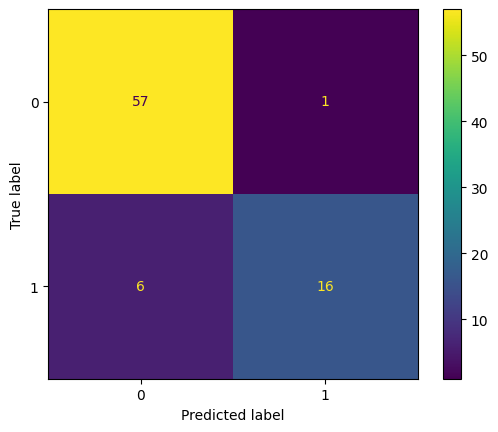

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

In [33]:
accuracy_score(y_test, y_preds)

0.9125

In [34]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



In [35]:
pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.904762,0.941176,0.9125,0.922969,0.914776
recall,0.982759,0.727273,0.9125,0.855016,0.912500
f1-score,0.942149,0.820513,0.9125,0.881331,0.908699
support,58.000000,22.000000,0.9125,80.000000,80.000000


The SVM didn't beat KNN model as it is a linear kernel
   * Prediction boundary is linear